In [1]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# La data se encuentra en kaggle por el tamaño de los datos no puede cargarse en github.

In [2]:
df_train = pd.read_csv('../datasets/input/fraudTrain.csv')
df_test = pd.read_csv('../datasets/input/fraudTest.csv')

In [3]:
df_alldata = pd.concat([df_train, df_test])

In [4]:
data = df_alldata[['trans_date_trans_time', 'is_fraud']]

In [5]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])

C:\Users\esteb\AppData\Local\Temp\ipykernel_21024\2116271243.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])


In [6]:
df_fraudes = data[data['is_fraud'] == 1]

In [7]:
df_fraudes_diarios = df_fraudes.resample('D', on='trans_date_trans_time').size().reset_index(name='total_fraudes')

In [8]:
df_fraudes_diarios.set_index('trans_date_trans_time', inplace=True)

In [9]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_fraudes_diarios['total_fraudes'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -5.487070943760043
p-value: 2.21765751021138e-06


Nota: 
Serie es estacionaria al ser p_value menor a 0.05

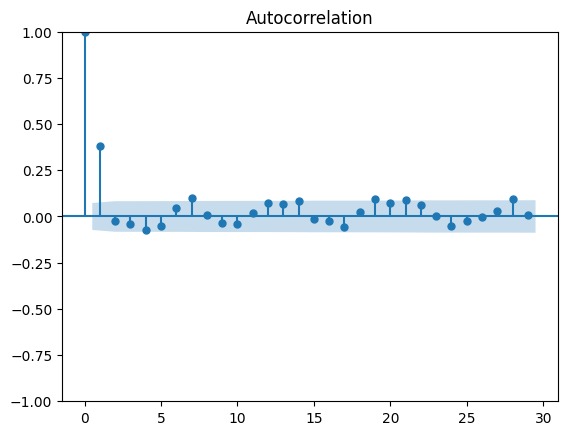

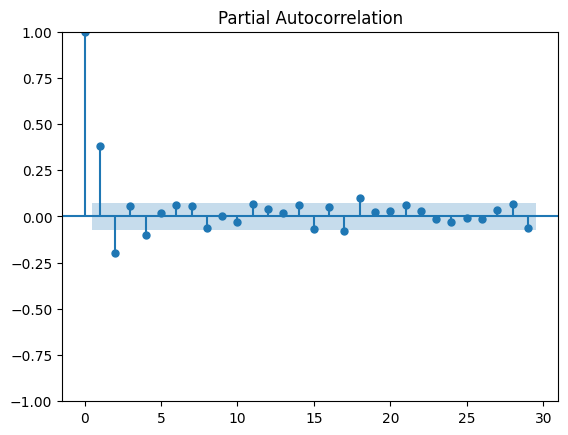

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Gráfico de ACF
plot_acf(df_fraudes_diarios['total_fraudes'])
plt.show()

# Gráfico de PACF
plot_pacf(df_fraudes_diarios['total_fraudes'])
plt.show()

In [20]:
# Definir el modelo ARIMA con parámetros (p, d, q)
model = ARIMA(df_fraudes_diarios[:-60], order=(40, 0, 80))  # Puedes ajustar los parámetros según sea necesario
model_fit = model.fit()

# Predecir los próximos 60 días (2 meses)
forecast = model_fit.forecast(steps=60)

# Visualizar los resultados
plt.figure(figsize=(10,6))
plt.plot(df_fraudes_diarios, label='Datos Históricos')
plt.plot(forecast.index, forecast, label='Predicción para 2 meses')
plt.legend()
plt.show()

c:\Users\esteb\OneDrive\Escritorio\No country\c20-70-n-data-bi\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\esteb\OneDrive\Escritorio\No country\c20-70-n-data-bi\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\esteb\OneDrive\Escritorio\No country\c20-70-n-data-bi\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\esteb\OneDrive\Escritorio\No country\c20-70-n-data-bi\.venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starti

KeyboardInterrupt: 

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

y_true = df_fraudes_diarios[-60:]  # Comparar con los últimos 60 días reales si están disponibles
mse = mean_squared_error(y_true, forecast)
mae = mean_absolute_error(y_true, forecast)
rmse = np.sqrt(mse)

print(f'MSE: {mse}, MAE: {mae}, RMSE: {rmse}')

MSE: 66.272935717541, MAE: 6.7998016163750865, RMSE: 8.140819106056897


ARIMA = 10, 0, 60
MSE: 68.82787156387485, MAE: 7.019428452747477, RMSE: 8.296256478911127

ARIMA = 40, 0, 60
MSE: 68.82787156387485, MAE: 7.019428452747477, RMSE: 8.296256478911127